# Chapter 3 Practice Answers

In [46]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np 
import pymc as pm
import scipy.stats as stats
from watermark import watermark

In [56]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-06-19T11:46:23.564816-04:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.17.2

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [57]:
%watermark --iversions

pymc      : 5.9.2
arviz     : 0.16.1
matplotlib: 3.8.2
scipy     : 1.11.3
numpy     : 1.25.2



In [59]:
#Chapter 3 HW Code to generate samples for the questions
num_points = int(1e3)
success = 6
trials = 9

p_grid = np.linspace(0,1,num_points)
prior = np.repeat(1,num_points)
likelihood = stats.binom.pmf(success, trials, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / unstd_posterior.sum()
samples = np.random.choice(p_grid, size=int(1e4), p=posterior)

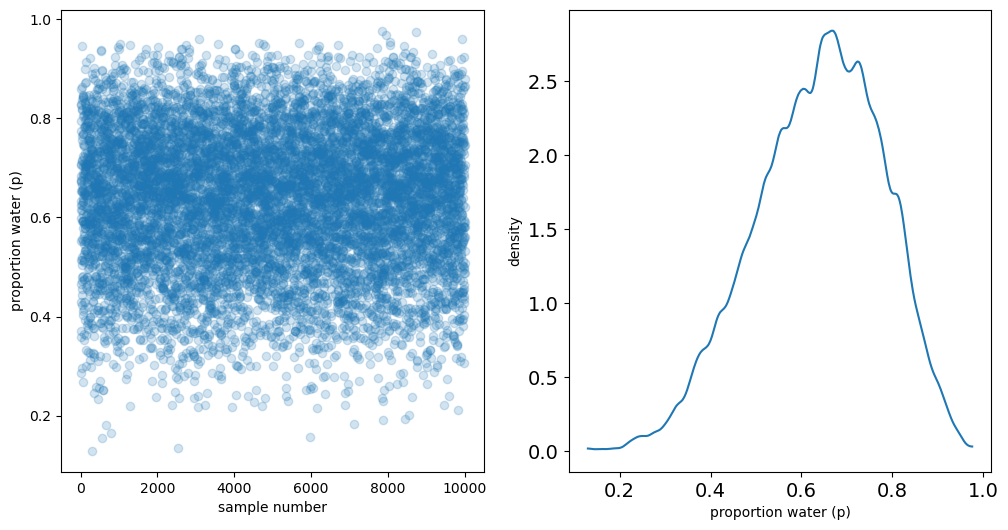

In [8]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

# 3E1 Question
How much posterior probability lies below p = 0.2?


In [9]:
np.sum(samples < 0.2) / samples.size

0.0009

# 3E2 Question
How much posterior probability lies above p = 0.8?


In [10]:
np.sum(samples > 0.8) / samples.size

0.1237

# 3E3 Question
How much posterior probability lies between p = 0.2 and p = 0.8?


In [12]:
np.sum((samples > 0.2) & (samples < 0.8)) / samples.size

0.8754

# 3E4 Question. 
20% of the posterior probability lies below which value of p?


In [13]:
np.sum(posterior[p_grid > 0.8])

0.12034491402214356

# 3E5 Question 
20% of the posterior probability lies above which value of p?

In [15]:
np.quantile(samples, 0.2)

0.5175175175175175

# 3E6 Question
Which values of p contain the narrowest interval equal to 66% of the posterior probability?


In [17]:
np.quantile(samples, 0.8)

0.7617617617617618

# 3E7 Question
Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the int

In [176]:
az.hdi(samples, hdi_prob=0.66)

array([0.50650651, 0.78078078])

In [18]:
np.quantile(samples, (1/6, 5/6))

array([0.4974975 , 0.77677678])

# 3M1 Question
Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.


In [21]:
num_points = int(1e3)
success = 8
trials = 15
p_grid = np.linspace(0,1,num_points)
prior = np.repeat(1,num_points)
likelihood = stats.binom.pmf(success, trials, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / unstd_posterior.sum()
samples = np.random.choice(p_grid, size=int(1e4), p=posterior)

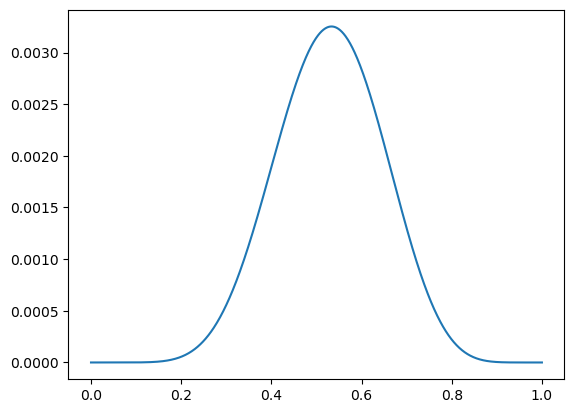

In [22]:
plt.plot(p_grid, posterior)

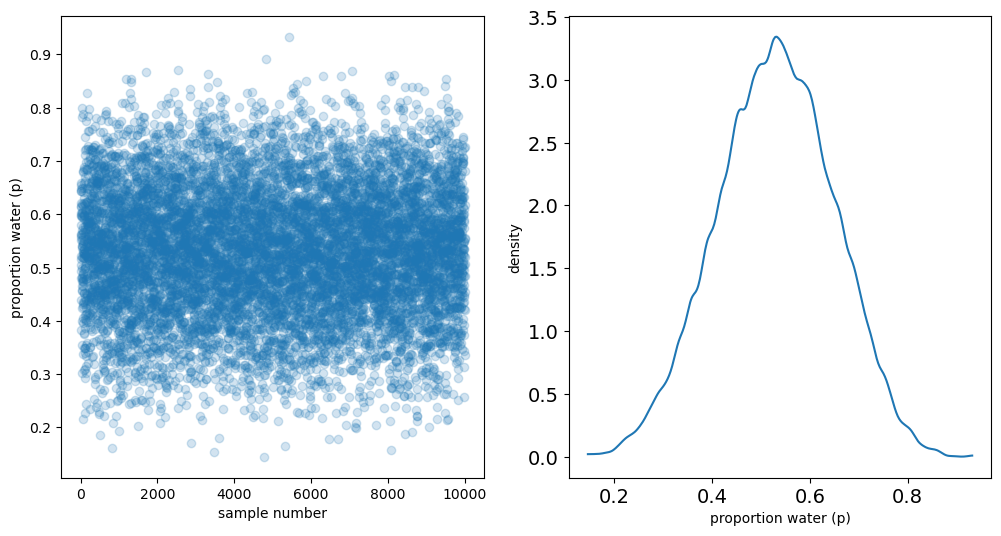

In [23]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

# 3M2 Question
Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.


In [24]:
az.hdi(samples, 0.9)

array([0.33533534, 0.72572573])

# 3M3 Question
Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing
8 water in 15 tosses?


In [28]:
simulated_samples = np.random.binomial(15, p=samples)

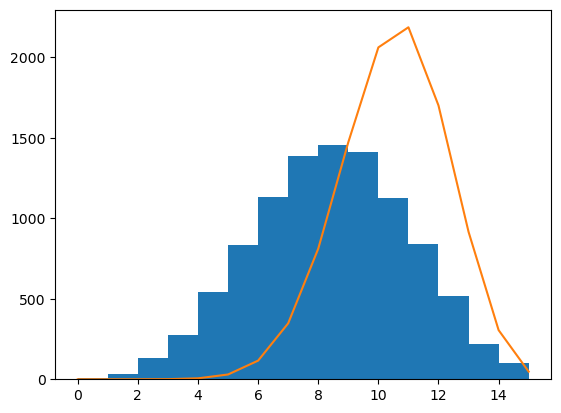

In [29]:
plt.hist(simulated_samples, bins=15)
plt.plot(10000 * stats.binom.pmf(np.linspace(0, 15, 16), n=15, p=0.7))

In [30]:
stats.binom.pmf(np.linspace(0, 15, 16), n=15, p=0.7)

array([1.43489070e-08, 5.02211745e-07, 8.20279184e-06, 8.29393397e-05,
       5.80575378e-04, 2.98028694e-03, 1.15900048e-02, 3.47700143e-02,
       8.11300333e-02, 1.47235986e-01, 2.06130381e-01, 2.18623131e-01,
       1.70040213e-01, 9.15601148e-02, 3.05200383e-02, 4.74756151e-03])

# 3M4 Question
Using the posterior distribution constructed from the new (8/15) data, now calculate the pro

In [31]:
np.sum(simulated_samples == 6) / simulated_samples.size

0.1134

# 3M5 Question 
Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5.
This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each
problem above and compare the inferences. What difference does the better prior make? If it helps,
compare inferences (using both priors) to the true value p = 0.7

In [242]:
num_points = int(1e3)
success = 8
trials = 15
p_grid = np.linspace(0,1,num_points)
prior = (p_grid > 0.5).astype(int)
likelihood = stats.binom.pmf(success, trials, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / unstd_posterior.sum()
samples = np.random.choice(p_grid, size=int(1e4), p=posterior)

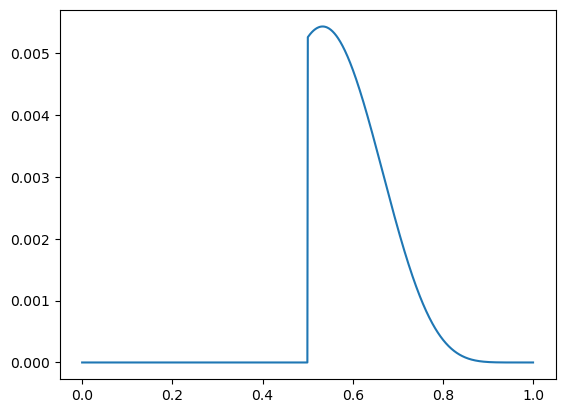

In [243]:
plt.plot(p_grid, posterior)

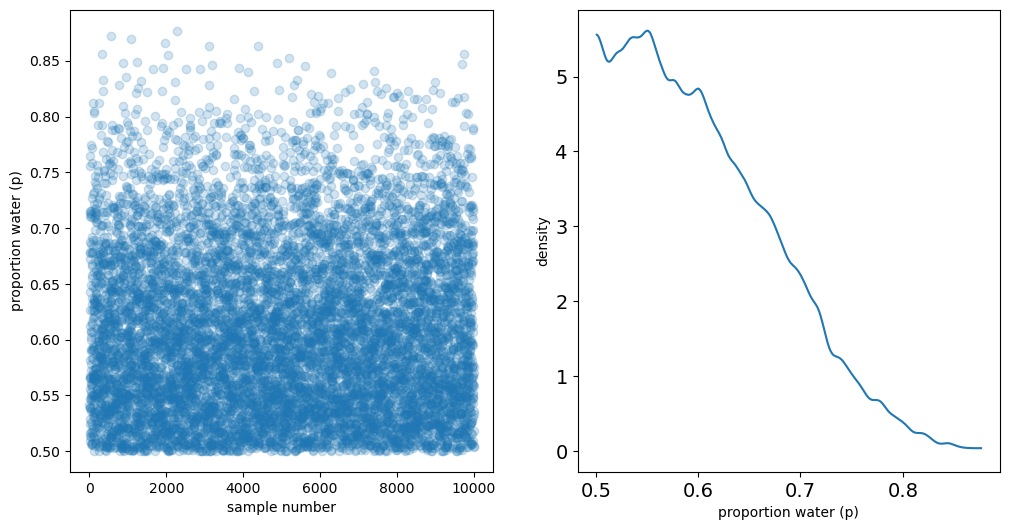

In [258]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

In [259]:
simulated_samples = np.random.binomial(15, p=samples)

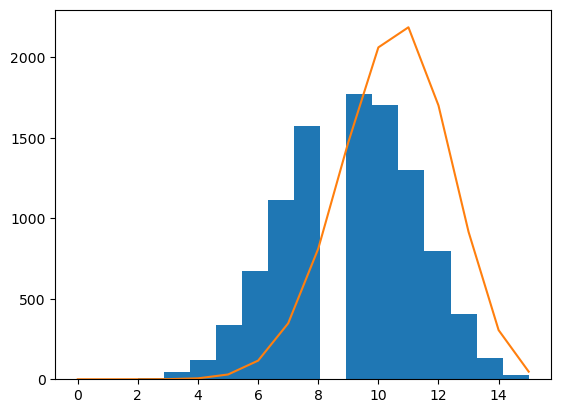

In [260]:
plt.hist(simulated_samples, bins=15)
plt.plot(10000 * stats.binom.pmf(np.linspace(0, 15, 16), n=15, p=0.7))

In [261]:
az.hdi(samples, 0.9)

array([0.5005005 , 0.71171171])

In [32]:
np.sum(simulated_samples == 6) / simulated_samples.size

0.1134

# 3M6 Question
Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you
want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means
the distance between the upper and lower bound of the interval should be 0.05. How many times will
you have to toss the globe to do this?

In [35]:
#Step Prior
intervals_size = 100
trials = 10
while intervals_size > 0.05:
    num_points = int(1e3)
    success = np.random.binomial(trials, p=0.7)
    p_grid = np.linspace(0,1,num_points)
    prior = (p_grid > 0.5).astype(int)
    likelihood = stats.binom.pmf(success, trials, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    samples = np.random.choice(p_grid, size=int(1e4), p=posterior)
    intervals = az.hdi(samples, 0.99)
    intervals_size = intervals[1] - intervals[0]
    trials = trials + 1
trials, intervals_size, intervals

(2099, 0.049049049049049054, array([0.68968969, 0.73873874]))

In [36]:
#Flat Priot
intervals_size = 100
trials = 10
while intervals_size > 0.05:
    num_points = int(1e3)
    success = np.random.binomial(trials, p=0.7)
    p_grid = np.linspace(0,1,num_points)
    prior = np.repeat(1, num_points)
    likelihood = stats.binom.pmf(success, trials, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    samples = np.random.choice(p_grid, size=int(1e4), p=posterior)
    intervals = az.hdi(samples, 0.99)
    intervals_size = intervals[1] - intervals[0]
    trials = trials + 1
trials, intervals_size, intervals

(2068, 0.049049049049049054, array([0.67367367, 0.72272272]))

# Hard Problems

In [37]:
#Data from textbook
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

# 3H1 Question
Using grid approximation, compute the posterior distribution for the probability of a birth
being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior
probability?

In [296]:
num_points = int(1e3)
success = np.sum(birth1 + birth2)
trials = len(birth1) + len(birth2)
p_grid = np.linspace(0,1,num_points)
prior = np.repeat(1, num_points)
likelihood = stats.binom.pmf(success, trials, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / unstd_posterior.sum()
success, trials

(111, 200)

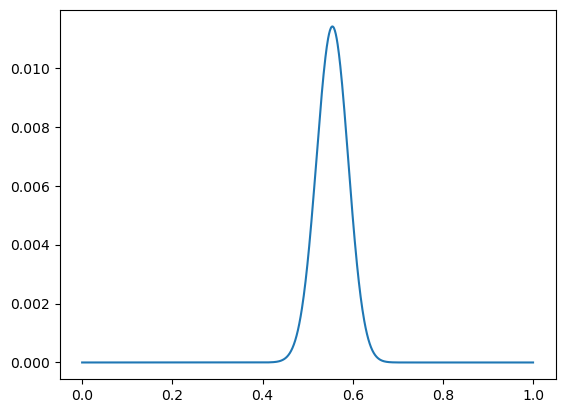

In [297]:
plt.plot(p_grid, posterior)

In [38]:
p_grid[np.argmax(posterior)]

0.6986986986986987

# 3H2 Question
Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.


In [39]:
samples = np.random.choice(p_grid, size=int(1e4), p=posterior)

In [40]:
print(f'50% HDI: {az.hdi(samples, 0.5)}')
print(f'89% HDI: {az.hdi(samples, 0.89)}')
print(f'97% HDI: {az.hdi(samples, 0.97)}')

50% HDI: [0.69269269 0.70570571]
89% HDI: [0.68268268 0.71471471]
97% HDI: [0.67767768 0.72072072]


# 3H3 Question
Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome

In [309]:
simulated_samples = np.random.binomial(200, p=samples)

(array([   7.,   53.,  445., 1160., 2103., 3163., 1860.,  999.,  174.,
          36.]),
 array([32. , 36.4, 40.8, 45.2, 49.6, 54. , 58.4, 62.8, 67.2, 71.6, 76. ]),
 <BarContainer object of 10 artists>)

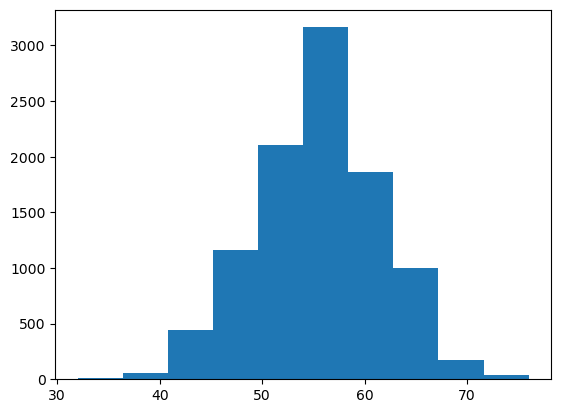

In [320]:
plt.hist(simulated_samples, bins=10)

In [322]:
simulated_samples = np.random.binomial(100, p=samples)

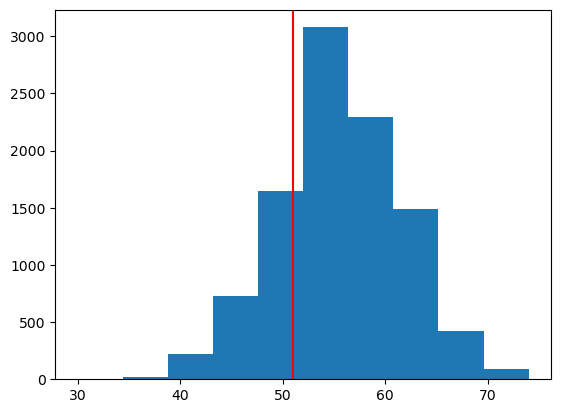

In [323]:
plt.hist(simulated_samples, bins=10)
plt.axvline(np.sum(birth1), c='r')

# 3H5 Question
The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts
of boys to only those second births that followed girls. To do this correctly, you need to count the
number of first borns who were girls and simulate that many births, 10,000 times. Compare the
counts of boys in your simulations to the actual observed count of boys following girls. How does the
model look in this light? Any guesses what is going on in these data?

In [340]:
first_born_girls = np.sum(birth1 == 0)
first_girl_second_boy = np.sum(birth2[birth1 == 0])
first_born_girls,first_girl_second_boy

(49, 39)

In [330]:
num_points = int(1e3)
success = np.sum(birth1 + birth2)
trials = len(birth1) + len(birth2)
p_grid = np.linspace(0,1,num_points)
prior = np.repeat(1, num_points)
likelihood = stats.binom.pmf(success, trials, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / unstd_posterior.sum()
success, trials

(111, 200)

In [334]:
samples = np.random.choice(p_grid, size=int(1e4), p=posterior)
first_born_girls_simulated_samples = np.random.binomial(first_born_girls, p=samples)

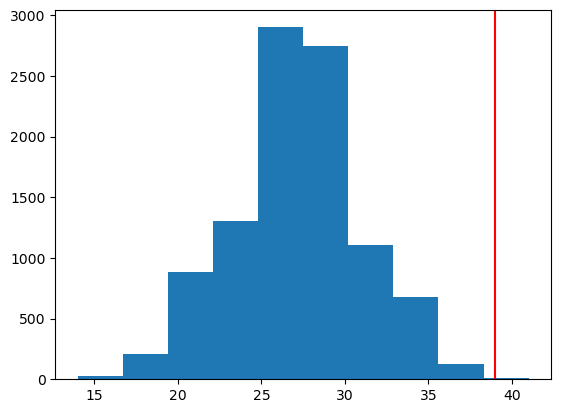

In [346]:
plt.hist(first_born_girls_simulated_samples, bins=10)
plt.axvline(first_girl_second_boy, color='r',label='First Birth Girls, Second Boy')

In [343]:
first_girl_second_boy

39